In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import nibabel as nib
from nilearn import plotting
import hcp_utils as hcp
import nibabel as nib
from scipy.stats import mannwhitneyu, wilcoxon
import numpy as np
import seaborn as sns

N_REGIONS = 200
modelos = [ 'hard_SHARED_CWEIGHT_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v1',
            # 'SHARED_copy_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v3', 
            # 'SHARED_copy_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v4',
            # 'SHARED_CWEIGHT_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v2',
            # 'Single_MMSE_Score_v2', 'Single_PMAT_v2', 'Single_Gender_v2',
            'Single_PMAT_v2', 'Single_MMSE_Score_v2','Single_Gender_v1'
            ]


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
import numpy as np
import matplotlib
import nilearn.plotting as plotting

def view_parcellation(meshLR, parcellation, subset=None, color=(0.9,0.9,0.9,1)):
    """
    View the given parcellation on an a whole brain surface mesh.
    """
    # for some parcellations the numerical ids need not be consecutive
    cortex_map = hcp.cortex_data(parcellation.map_all)
    ids = np.unique(cortex_map)
    normalized_cortex_map = np.zeros_like(cortex_map)
    rgba = np.zeros((len(ids), 4))
    for i in range(len(ids)):
        ind = cortex_map==ids[i]
        normalized_cortex_map[ind] = i
        if subset is None or i in subset:
            rgba[i,:] = parcellation.rgba[ids[i]]
        else:
            rgba[i,:] = color

    cmap = matplotlib.colors.ListedColormap(rgba)
    return plotting.view_surf(meshLR, normalized_cortex_map, symmetric_cmap=False, cmap=cmap)

# view_parcellation(hcp.mesh.inflated, hcp.ca_network, subset=[2,3,4,9])


In [4]:
import pandas as pd
behavioral_df = pd.read_csv('../../../hcp_data/unrestricted_mariliasilveira_12_26_2021_14_39_25.csv')
behavioral_restrict = pd.read_csv('../../../hcp_data/RESTRICTED_mariliasilveira_10_21_2021_5_57_58.csv')

subjectsID_df = pd.read_csv('../../../hcp_data/subjectIDs_recon2.txt',header=None,names=["Subject"])
filter_behavioral_df = behavioral_restrict.merge(behavioral_df, on='Subject', how='inner')
filter_behavioral_df = filter_behavioral_df.merge(subjectsID_df, on='Subject', how='inner')

In [5]:
indexes_train = np.loadtxt("data/hcp_1200/indexes_train_balanced.txt",  dtype=float).astype(int)
indexes_test = np.loadtxt("data/hcp_1200/indexes_test_balanced.txt",  dtype=float).astype(int)


In [6]:
import hcp_utils as hcp
import nibabel as nib
img = nib.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/hcp_data/groupICA_3T_HCP1200_MSMAll_d200.ica/melodic_IC_ftb.dlabel.nii')
X = img.get_fdata()
img_scalar = nib.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/hcp_data/groupICA_3T_HCP1200_MSMAll_d200.ica/melodic_IC.dscalar.nii')
X_scalar = img.get_fdata()

# behavioral descript

In [7]:
filter_behavioral_df.columns

Index(['Subject', 'Age_in_Yrs', 'HasGT', 'ZygositySR', 'ZygosityGT',
       'Family_ID', 'Mother_ID', 'Father_ID', 'TestRetestInterval', 'Race',
       ...
       'Noise_Comp', 'Odor_Unadj', 'Odor_AgeAdj', 'PainIntens_RawScore',
       'PainInterf_Tscore', 'Taste_Unadj', 'Taste_AgeAdj', 'Mars_Log_Score',
       'Mars_Errs', 'Mars_Final'],
      dtype='object', length=782)

In [8]:
filter_behavioral_df[['Gender','Age_in_Yrs','MMSE_Score', 'PMAT24_A_CR', 'NEOFAC_N','FamHist_Moth_None','FamHist_Fath_None']]

,Gender,Age_in_Yrs,MMSE_Score,PMAT24_A_CR,NEOFAC_N,FamHist_Moth_None,FamHist_Fath_None
0,M,27,30,20.0,21.0,0.0,1.0
1,M,27,30,23.0,7.0,1.0,1.0
2,F,35,28,11.0,13.0,1.0,0.0
3,M,22,29,14.0,12.0,1.0,0.0
4,M,29,29,15.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...
807,M,30,29,23.0,10.0,1.0,1.0
808,F,33,30,21.0,7.0,1.0,1.0
809,F,29,30,21.0,10.0,1.0,1.0
810,M,30,28,20.0,22.0,1.0,0.0


In [9]:
dhBehavioralTrain = filter_behavioral_df.iloc[indexes_train,:]
dhBehavioralTest = filter_behavioral_df.iloc[indexes_test,:]

dhBehavioralTest[['Gender','Age_in_Yrs','MMSE_Score', 'PMAT24_A_CR', 'NEOFAC_N','FamHist_Moth_None','FamHist_Fath_None']]

,Gender,Age_in_Yrs,MMSE_Score,PMAT24_A_CR,NEOFAC_N,FamHist_Moth_None,FamHist_Fath_None
263,M,23,30,18.0,1.0,1.0,1.0
217,M,26,29,14.0,21.0,1.0,1.0
63,M,27,29,23.0,5.0,1.0,1.0
374,M,33,29,22.0,11.0,1.0,1.0
759,M,31,29,16.0,8.0,1.0,1.0
...,...,...,...,...,...,...,...
766,M,27,28,19.0,2.0,1.0,0.0
35,M,31,28,19.0,12.0,1.0,1.0
299,M,31,29,21.0,25.0,1.0,1.0
738,F,32,26,16.0,35.0,1.0,1.0


In [10]:
dhBehavioralTest.shape, dhBehavioralTrain.shape

((162, 782), (648, 782))

In [11]:
dhBehavioralTest['Gender'].value_counts(), dhBehavioralTrain['Gender'].value_counts()

(M    87
 F    75
 Name: Gender, dtype: int64,
 F    334
 M    314
 Name: Gender, dtype: int64)

In [12]:
dhBehavioralTest['FamHist_Moth_None'].value_counts(),dhBehavioralTrain['FamHist_Moth_None'].value_counts()

(1.0    148
 0.0     13
 Name: FamHist_Moth_None, dtype: int64,
 1.0    548
 0.0     98
 Name: FamHist_Moth_None, dtype: int64)

In [13]:
dhBehavioralTest['FamHist_Fath_None'].value_counts(),dhBehavioralTrain['FamHist_Fath_None'].value_counts()

(1.0    130
 0.0     31
 Name: FamHist_Fath_None, dtype: int64,
 1.0    532
 0.0    114
 Name: FamHist_Fath_None, dtype: int64)

In [14]:
dhBehavioralTest['Age_in_Yrs'].mean(), dhBehavioralTest['Age_in_Yrs'].std(), dhBehavioralTrain['Age_in_Yrs'].mean(), dhBehavioralTrain['Age_in_Yrs'].std()

(28.765432098765434, 3.5935470286213844, 28.33641975308642, 3.7644436922263953)

In [15]:
dhBehavioralTest['MMSE_Score'].mean(), dhBehavioralTest['MMSE_Score'].std(), dhBehavioralTrain['MMSE_Score'].mean(), dhBehavioralTrain['MMSE_Score'].std()

(29.0, 1.0690449676496976, 29.00462962962963, 1.0453297262815069)

In [16]:
dhBehavioralTest['PMAT24_A_CR'].mean(), dhBehavioralTest['PMAT24_A_CR'].std(), dhBehavioralTrain['PMAT24_A_CR'].mean(), dhBehavioralTrain['PMAT24_A_CR'].std()

(17.32919254658385, 4.521858574628813, 17.08062015503876, 4.771780360994028)

# viz

In [17]:
def criaStatsMap(data, SCORES, nome, path, threshold = 0.001):
    pos_map = data.copy()
    for i in range(200):
        pos_map[:,:,:,i] = data[:,:,:,i] * SCORES[i]
    mean_map = np.mean(data,axis=3)

    Sum_pos_map = np.mean(pos_map,axis=3)
    pos = Sum_pos_map
    img_map = nib.Nifti1Image(pos, img.affine)
    pos_map_nii = nib.Nifti1Image(pos_map, img.affine)
    nib.save(img_map, path + '/CCA1_'+nome+'.nii.gz')
    nib.save(pos_map_nii, path + '/4D_CCA1_'+nome+'.nii.gz')
    plotting.plot_img_on_surf(img_map, views=['lateral', 'medial'], hemispheres=['left', 'right'],
                          colorbar=True, threshold=threshold, output_file=path + '/' + nome+'____img_on_surface.png')

def criaStatsMap_v2(img, SCORES, nome, path, threshold = 0.001):
    data = img.get_fdata()
    vet = np.copy(data[0])
    for i in range(200):
        vet[vet == i] = SCORES[i]
    vetFinal = vet[None,:]
    img_map = nib.Cifti2Image(vetFinal, header=img.header)
    nib.save(img_map, path + '/vetScores_'+nome+'.nii')
    Xp = hcp.parcellate(vetFinal, hcp.ca_network)
    df = hcp.ranking(Xp[0], hcp.ca_network)
    df.to_csv(path + 'raking_'+nome+'.csv')
    print(df)
    return plotting.view_surf(hcp.mesh.inflated, hcp.cortex_data(vet, fill=0), bg_map=hcp.mesh.sulc)
    # output_file=path + '/' + nome+'____img_on_surface.png'

def criaStatsMap_v3(img, SCORES, nome, path, threshold = 0.001):
    data = img.get_fdata()
    vet = np.copy(data[0])
    for i in range(200):
        vet[vet == i] = SCORES[i]
    vetFinal = vet[None,:]
    img_map = nib.Cifti2Image(vetFinal, header=img.header)
    nib.save(img_map, path + '/vet_v3_Scores_'+nome+'.nii')
    Xp = hcp.parcellate(data, hcp.standard)
    df = hcp.ranking(Xp[0], hcp.standard)
    print(df.head())

    return plotting.view_surf(hcp.mesh.inflated, hcp.cortex_data(vet, fill=0), bg_map=hcp.mesh.sulc, cmap='Accent')



                  region  id      data
0      Cingulo-Opercular   4  2.149830
1                Visual1   1  1.620135
2       Orbito-Affective  12  1.247743
3               Auditory   8  0.791472
4               Language   6  0.675136
5         Frontoparietal   7  0.610200
6     Ventral-Multimodal  11  0.504504
7   Posterior-Multimodal  10  0.476826
8            Somatomotor   3  0.384659
9                Default   9  0.380386
10      Dorsal-attention   5  0.344333
11               Visual2   2  0.247317
                  region  id      data
0      Cingulo-Opercular   4  1.966228
1                Visual1   1  1.585683
2       Orbito-Affective  12  0.917979
3               Auditory   8  0.664138
4         Frontoparietal   7  0.646069
5     Ventral-Multimodal  11  0.519108
6               Language   6  0.502235
7   Posterior-Multimodal  10  0.406120
8                Default   9  0.372655
9                Visual2   2  0.280871
10      Dorsal-attention   5  0.248901
11           Somatomotor 

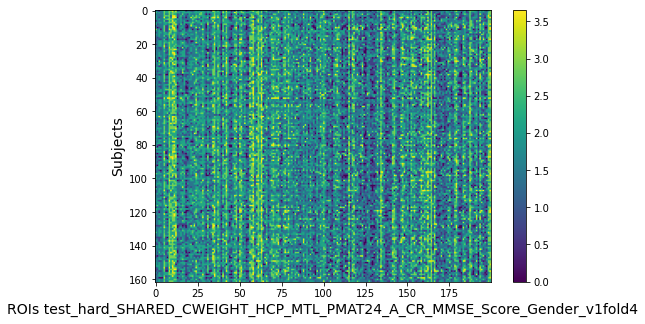

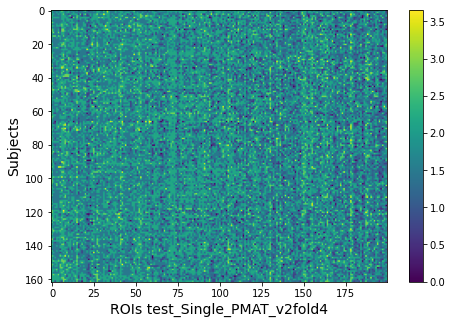

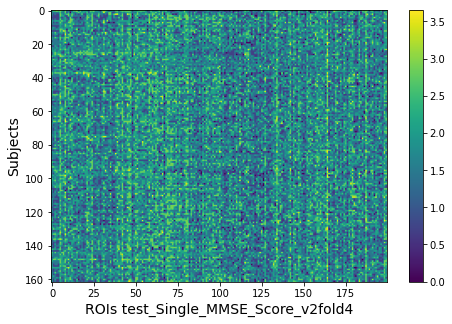

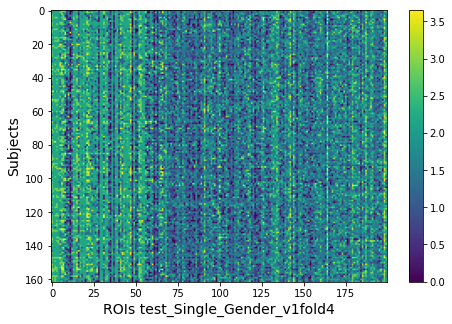

In [18]:
img = nib.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/hcp_data/groupICA_3T_HCP1200_MSMAll_d200.ica/melodic_IC_ftb.dlabel.nii')

for modelo in modelos:
    finalBrainCell = None
    for i in range(5):
        nome = 'test_' + modelo+ 'fold'+str(i)
        
        if modelo.startswith('Single'):
            path = '/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/'+nome
        else:
            path = '/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_multitask/scores/'+nome
        final = np.array([])
        for root, subdirectories, files in os.walk(path):
            for subdirectory in set(subdirectories):
                s1 = np.load(os.path.join(root,subdirectory,'s1.npy'))
                s2 = np.load(os.path.join(root,subdirectory,'s2.npy'))
                w1 = np.load(os.path.join(root,subdirectory,'w1.npy'))
                w2 = np.load(os.path.join(root,subdirectory,'w2.npy'))
                perm1 = np.load(os.path.join(root,subdirectory,'perm1.npy'))
                perm2 = np.load(os.path.join(root,subdirectory,'perm2.npy'))
                perm1 = perm1.reshape(s1.shape)
                perm2 = perm2.reshape(s2.shape)
                N_REGIONS = 200
                matrix_pesos = [0.0] * N_REGIONS * perm1.shape[0]
                for subject, s1_subj in zip(perm1, s1):
                    for index_perm, i in enumerate(subject):
                        if s1_subj[index_perm] > 0.2:
                            matrix_pesos[i] = s1_subj[index_perm]
                
                arr_2d = np.reshape(matrix_pesos, (perm1.shape[0], N_REGIONS))
                if len(final)==0:
                    final = arr_2d
                else:
                    final = np.concatenate((final, arr_2d))
        if finalBrainCell is None:
            finalBrainCell = final  
        else:
            finalBrainCell =  finalBrainCell + final

    with open(path+'/scores'+nome+'.npy', 'wb') as f:
        np.save(f, finalBrainCell)
    fig = plt.figure(figsize=(8,5))
    plt.xlabel('ROIs '+ nome, fontsize=14)
    plt.ylabel('Subjects', fontsize=14)
    plt.imshow(finalBrainCell)
    plt.colorbar( orientation = 'vertical')
    # fig.savefig(path+'/' + nome+'_all_subjects_scores.png')
    importance = np.median(final, axis=0)
    with open(path+'/median_scores'+nome+'.npy', 'wb') as f:
        np.save(f, importance)
    SCORES = importance.reshape(1, -1)[0].astype('float32')
    criaStatsMap_v2(img, SCORES, nome, path)
    # SCORES[aceita_todas] = 1
    # SCORES[intersectionAllRej] = SCORES[intersectionAllRej] * 0
    # criaStatsMap_v2(img, SCORES, nome + 'aceita', path)
        

In [19]:
mean_mtl = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_multitask/scores/test_hard_SHARED_CWEIGHT_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v1fold4/median_scorestest_hard_SHARED_CWEIGHT_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v1fold4.npy')
mean_single_pmat = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_PMAT_v2fold4/median_scorestest_Single_PMAT_v2fold4.npy')
mean_single_mmse = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_MMSE_Score_v2fold4/median_scorestest_Single_MMSE_Score_v2fold4.npy')
mean_single_gender = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_Gender_v1fold4/median_scorestest_Single_Gender_v1fold4.npy')


# Wilcoxon two-side

In [20]:
a = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_multitask/scores/test_hard_SHARED_CWEIGHT_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v1fold4/scorestest_hard_SHARED_CWEIGHT_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v1fold4.npy')
pmat_scores = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_PMAT_v2fold4/scorestest_Single_PMAT_v2fold4.npy')
mmse_scores = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_MMSE_Score_v2fold4/scorestest_Single_MMSE_Score_v2fold4.npy')
gender_scores = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_Gender_v1fold4//scorestest_Single_Gender_v1fold4.npy')
# b = np.load('vetor_scorestest_HCP_MTL_reg_gender_pmat_mmse_v4.npy')

listRejeita = dict({'PMAT':list(), 'MMSE':list(), 'Gender':list()})
listAceita =  dict({'PMAT':list(), 'MMSE':list(), 'Gender':list()})
cols = pd.MultiIndex.from_product([['Single PMAT - MTL','Single MMSE Score - MTL', 'Single Gender - MTL'], ['W', 'p']])
dfResult = pd.DataFrame(columns=cols)
for region in range(N_REGIONS):
    dfResult.loc[region,'idRegion'] = region
    w, p = wilcoxon(a[:, region],pmat_scores[:, region])
    
    dfResult.loc[region,'Single PMAT - MTL'] = (w, p)
    if p < 0.05:
        # print("Hipotese nula rejeitada, data are different in your case")
        listRejeita['PMAT'].append(region)
    else:
        # print("we have not enough evidences to reject H0")
        listAceita['PMAT'].append(region)
    
    w, p_ = wilcoxon(a[:, region],mmse_scores[:, region])
    dfResult.loc[region,'Single MMSE Score - MTL'] = (w, p_)
    if p_ < 0.05:
        # print("Hipotese nula rejeitada")
        listRejeita['MMSE'].append(region)
    else:
        # print("Hipotese nula aceita")
        listAceita['MMSE'].append(region)

    w, p_ = wilcoxon(a[:, region],gender_scores[:, region])
    dfResult.loc[region,'Single Gender - MTL'] = (w, p_)
    if p_ < 0.05:
        # print("Hipotese nula rejeitada")
        listRejeita['Gender'].append(region)
    else:
        # print("Hipotese nula aceita")
        listAceita['Gender'].append(region)

print("Aceitam: PMAT {:%d} MMSE {:%d} Gender {:%d}" % (len(listAceita['PMAT']), len(listAceita['MMSE']),len(listAceita['Gender'])))
print("Rejeitam: PMAT {:%d} MMSE {:%d} Gender {:%d}" % (len(listRejeita['PMAT']), len(listRejeita['MMSE']), len(listRejeita['Gender'])))

dictTaks = {
    'PMAT' : 'Inteligência Fluida',
    'Gender' : 'Gênero',
    'MMSE' : 'Escore Cognitivo'
}
# for key in dictTaks.keys():
#     fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,4))
#     fig.suptitle(dictTaks[key])
#     sns.distplot(ax=axes[0], a=mean_mtl[listRejeita[key]],label='MTL')
#     sns.distplot(ax=axes[0], a=mean_single_pmat[listRejeita[key]],label='Single-task')
#     axes[0].set_title('p < 0.05')

#     sns.distplot(ax=axes[1], a=mean_mtl[listAceita[key]],label='MTL')
#     sns.distplot(ax=axes[1], a=mean_single_pmat[listAceita[key]],label='Single-task')
#     axes[1].set_title('p > 0.05')
#     plt.legend()
#     plt.savefig(str(key) + "_density.png")


Aceitam: PMAT {:40} MMSE {:63} Gender {:26}
Rejeitam: PMAT {:160} MMSE {:137} Gender {:174}


In [21]:
mnet1 = nib.load('data/hcp_1200/Mnet1.pconn.nii')

In [22]:
dfResult.head()

Single PMAT - MTL           Single MMSE Score - MTL            \
                  W         p                       W         p   
0             654.0       0.0                  5087.0  0.028584   
1            1347.0       0.0                  5559.5  0.318648   
2            4359.0  0.003711                  5715.0  0.470349   
3            2035.0       0.0                  5440.5  0.227172   
4             641.0       0.0                  5300.5  0.183218   

  Single Gender - MTL      idRegion  
                    W    p           
0              1142.0  0.0      0.0  
1                15.0  0.0      1.0  
2               973.5  0.0      2.0  
3                13.0  0.0      3.0  
4                 9.0  0.0      4.0

In [23]:
def arrumaNum(x):
    if x  <= 0.000001:
        return '%.4e' % x
    else:
        return '%.4f' % x

dfResult['Single PMAT - MTL']['p'] = dfResult['Single PMAT - MTL']['p'].apply(lambda x: arrumaNum(x))
dfResult['Single MMSE Score - MTL']['p'] = dfResult['Single MMSE Score - MTL']['p'].apply(lambda x: arrumaNum(x))
dfResult['Single Gender - MTL']['p'] = dfResult['Single Gender - MTL']['p'].apply(lambda x: arrumaNum(x))

dfResult

/tmp/ipykernel_367559/380126633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfResult['Single PMAT - MTL']['p'] = dfResult['Single PMAT - MTL']['p'].apply(lambda x: arrumaNum(x))
/tmp/ipykernel_367559/380126633.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfResult['Single MMSE Score - MTL']['p'] = dfResult['Single MMSE Score - MTL']['p'].apply(lambda x: arrumaNum(x))
/tmp/ipykernel_367559/380126633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Single PMAT - MTL           Single MMSE Score - MTL            \
                    W         p                       W         p   
0               654.0       0.0                  5087.0  0.028584   
1              1347.0       0.0                  5559.5  0.318648   
2              4359.0  0.003711                  5715.0  0.470349   
3              2035.0       0.0                  5440.5  0.227172   
4               641.0       0.0                  5300.5  0.183218   
..                ...       ...                     ...       ...   
195            4888.0  0.004164                  5987.0  0.367871   
196            6356.0  0.681404                  3898.0  0.000006   
197            3238.0       0.0                  5697.0  0.205581   
198             600.0       0.0                  3870.0  0.000005   
199             256.0       0.0                   856.0       0.0   

    Single Gender - MTL           idRegion  
                      W         p           
0                1142.0       0.0      0.0  
1                  15.0       0.0      1.0  
2                 973.5       0.0      2.0  
3                  13.0       0.0      3.0  
4                   9.0       0.0      4.0  
..                  ...       ...      ...  
195              5031.0  0.011935    195.0  
196              3450.0       0.0    196.0  
197              4042.0  0.000019    197.0  
198              5060.0  0.009942    198.0  
199               625.0       0.0    199.0  

[200 rows x 7 columns]

In [24]:
dfResult['Single PMAT - MTL']['p']

0           0.0
1           0.0
2      0.003711
3           0.0
4           0.0
         ...   
195    0.004164
196    0.681404
197         0.0
198         0.0
199         0.0
Name: p, Length: 200, dtype: object

In [25]:
dfResult.to_csv("wilcoxon_results.csv")

# Intersecção entre as regiões p < 0.05 para todas as tarefas

In [44]:
intersection = set(listRejeita['Gender']).intersection(listRejeita['MMSE'])
intersectionAllRej = intersection.intersection(listRejeita['PMAT'])
intersectionAllRej = list(set(intersectionAllRej))
len(intersectionAllRej)

6

In [27]:
allRois = list(range(200))
X_ = np.array(X)
dfEquivalente = pd.DataFrame({'todas': allRois})
dfEquivalente['equivalente_standard'] = dfEquivalente['todas'].apply(lambda x: np.unique(hcp.standard.map_all[np.where(X_[0] == x+1)]))
dfEquivalente['equivalente_standard_label'] = dfEquivalente['equivalente_standard'].apply(lambda x : [hcp.standard.labels[x] for x in x])
dfEquivalente['equivalente_yeo7'] = dfEquivalente['todas'].apply(lambda x: np.unique(hcp.yeo7.map_all[np.where(X_[0] == x+1)]))
dfEquivalente['equivalente_yeo7_label'] = dfEquivalente['equivalente_yeo7'].apply(lambda x : [hcp.yeo7.labels[x] for x in x])
dfEquivalente['equivalente_ca_network'] = dfEquivalente['todas'].apply(lambda x: np.unique(hcp.ca_network.map_all[np.where(X_[0] == x+1)]))
dfEquivalente['equivalente_ca_network_label'] = dfEquivalente['equivalente_ca_network'].apply(lambda x : [hcp.ca_network.labels[x] for x in x])
dfEquivalente

,todas,equivalente_standard,equivalente_standard_label,equivalente_yeo7,equivalente_yeo7_label,equivalente_ca_network,equivalente_ca_network_label
0,0,[2],[cortex_right],[1],[Visual],"[1, 2]","[Visual1, Visual2]"
1,1,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2]
2,2,"[1, 2, 369, 370]","[cortex_left, cortex_right, diencephalon_left,...","[0, 1]","[, Visual]","[1, 2, 9]","[Visual1, Visual2, Default]"
3,3,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2]
4,4,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2]
...,...,...,...,...,...,...,...
195,195,[368],[cerebellum_right],[0],[],"[3, 4, 5, 7, 10]","[Somatomotor, Cingulo-Opercular, Dorsal-attent..."
196,196,[367],[cerebellum_left],[0],[],"[3, 4, 7, 10]","[Somatomotor, Cingulo-Opercular, Frontoparieta..."
197,197,"[2, 370, 372, 378]","[cortex_right, diencephalon_right, hippocampus...","[0, 1, 5, 7]","[, Visual, Limbic, Default]","[1, 2, 3, 7, 8, 9, 12]","[Visual1, Visual2, Somatomotor, Frontoparietal..."
198,198,"[1, 369, 371, 373]","[cortex_left, diencephalon_left, hippocampus_l...","[0, 1, 7]","[, Visual, Default]","[1, 2, 3, 4, 7, 8, 9]","[Visual1, Visual2, Somatomotor, Cingulo-Opercu..."


(196, 3)


<AxesSubplot:ylabel='equivalente_yeo7_label'>

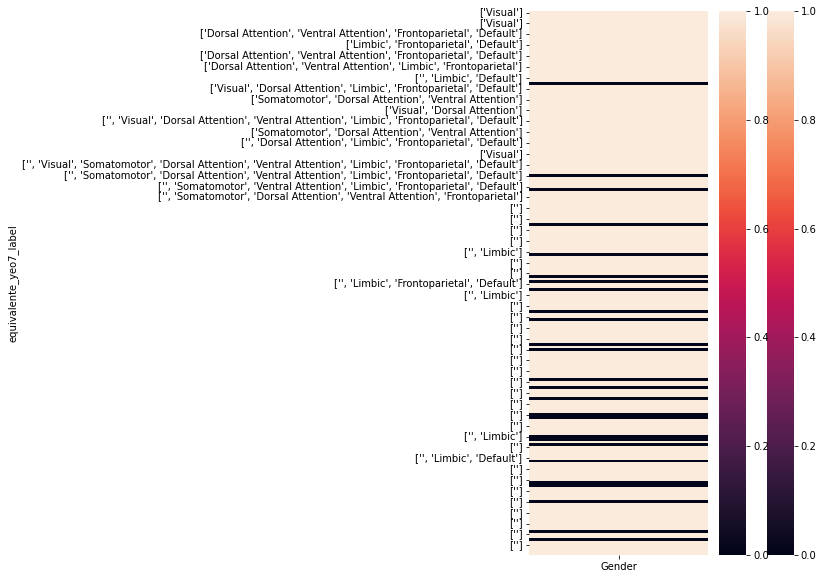

In [28]:
import pandas as pd
dataframe = pd.DataFrame({'Gender' : np.isin(allRois, listRejeita['Gender']),
                            'PMAT':np.isin(allRois, listRejeita['PMAT']),
                            'MMSE':np.isin(allRois, listRejeita['MMSE']), 
                            'todas':allRois})
pivotado = dataframe.pivot_table(index='todas')
print(pivotado.loc[~(pivotado==0).all(axis=1)].shape)
fig = plt.figure(figsize=(5,10))
sns.heatmap(pivotado.loc[~(pivotado==0).all(axis=1)])
# sns.heatmap(pivotado.loc[(pivotado==0).all(axis=1)])
merjado = pd.merge(dfEquivalente,pivotado, on='todas')

sns.heatmap(merjado[['equivalente_yeo7_label','Gender']].set_index('equivalente_yeo7_label'))


In [29]:
merjado

,todas,equivalente_standard,equivalente_standard_label,equivalente_yeo7,equivalente_yeo7_label,equivalente_ca_network,equivalente_ca_network_label,Gender,MMSE,PMAT
0,0,[2],[cortex_right],[1],[Visual],"[1, 2]","[Visual1, Visual2]",1.0,1.0,1.0
1,1,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2],1.0,0.0,1.0
2,2,"[1, 2, 369, 370]","[cortex_left, cortex_right, diencephalon_left,...","[0, 1]","[, Visual]","[1, 2, 9]","[Visual1, Visual2, Default]",1.0,0.0,1.0
3,3,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2],1.0,0.0,1.0
4,4,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2],1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
195,195,[368],[cerebellum_right],[0],[],"[3, 4, 5, 7, 10]","[Somatomotor, Cingulo-Opercular, Dorsal-attent...",1.0,0.0,1.0
196,196,[367],[cerebellum_left],[0],[],"[3, 4, 7, 10]","[Somatomotor, Cingulo-Opercular, Frontoparieta...",1.0,1.0,0.0
197,197,"[2, 370, 372, 378]","[cortex_right, diencephalon_right, hippocampus...","[0, 1, 5, 7]","[, Visual, Limbic, Default]","[1, 2, 3, 7, 8, 9, 12]","[Visual1, Visual2, Somatomotor, Frontoparietal...",1.0,0.0,1.0
198,198,"[1, 369, 371, 373]","[cortex_left, diencephalon_left, hippocampus_l...","[0, 1, 7]","[, Visual, Default]","[1, 2, 3, 4, 7, 8, 9]","[Visual1, Visual2, Somatomotor, Cingulo-Opercu...",1.0,1.0,1.0


In [30]:
# b = np.load('vetor_scorestest_HCP_MTL_reg_gender_pmat_mmse_v4.npy')
N_REGIONS = len(hcp.ca_network.nontrivial_ids)
novoa = np.zeros((a.shape[0],N_REGIONS))
novopmat_scores = np.zeros((pmat_scores.shape[0],N_REGIONS))
novommse_scores = np.zeros((mmse_scores.shape[0],N_REGIONS))
novogender_scores = np.zeros((gender_scores.shape[0],N_REGIONS))

for sub in list(range(a.shape[0])):
    for pos in list(range(200)):
        modify = merjado.iloc[pos]['equivalente_ca_network'] 
        print(modify)
        for i in modify:
            novoa[sub][i-1] +=  a[sub][pos]
            novopmat_scores[sub][i-1] +=  pmat_scores[sub][pos]
            novommse_scores[sub][i-1] +=  mmse_scores[sub][pos]
            novogender_scores[sub][i-1] +=  gender_scores[sub][pos]

listRejeita = dict({'PMAT':list(), 'MMSE':list(), 'Gender':list()})
listAceita =  dict({'PMAT':list(), 'MMSE':list(), 'Gender':list()})
cols = pd.MultiIndex.from_product([['Single PMAT - MTL','Single MMSE Score - MTL', 'Single Gender - MTL'], ['W', 'p']])
dfResult = pd.DataFrame(columns=cols)
for region in range(N_REGIONS):
    dfResult.loc[region,'idRegion'] = region
    w, p = wilcoxon(novoa[:, region],novopmat_scores[:, region])
    
    dfResult.loc[region,'Single PMAT - MTL'] = (w, p)
    if p < 0.05:
        # print("Hipotese nula rejeitada, data are different in your case")
        listRejeita['PMAT'].append(region)
    else:
        # print("we have not enough evidences to reject H0")
        listAceita['PMAT'].append(region)
    
    w, p_ = wilcoxon(novoa[:, region],novommse_scores[:, region])
    dfResult.loc[region,'Single MMSE Score - MTL'] = (w, p_)
    if p_ < 0.05:
        # print("Hipotese nula rejeitada")
        listRejeita['MMSE'].append(region)
    else:
        # print("Hipotese nula aceita")
        listAceita['MMSE'].append(region)

    w, p_ = wilcoxon(novoa[:, region],novogender_scores[:, region])
    dfResult.loc[region,'Single Gender - MTL'] = (w, p_)
    if p_ < 0.05:
        # print("Hipotese nula rejeitada")
        listRejeita['Gender'].append(region)
    else:
        # print("Hipotese nula aceita")
        listAceita['Gender'].append(region)

print("Aceitam: PMAT {:%d} MMSE {:%d} Gender {:%d}" % (len(listAceita['PMAT']), len(listAceita['MMSE']),len(listAceita['Gender'])))
print("Rejeitam: PMAT {:%d} MMSE {:%d} Gender {:%d}" % (len(listRejeita['PMAT']), len(listRejeita['MMSE']), len(listRejeita['Gender'])))

dictTaks = {
    'PMAT' : 'Inteligência Fluida',
    'Gender' : 'Gênero',
    'MMSE' : 'Escore Cognitivo'
}

[1 2]
[2]
[1 2 9]
[2]
[2]
[ 5  7  9 10 12]
[1 2]
[1 2]
[4 5 7 9]
[2 4 5 7]
[7 9]
[1 7 9]
[7 9]
[3 4]
[1 2]
[1 2]
[4 7]
[2]
[ 2  3  4  5  6 11]
[ 2  5 11]
[ 2  3  4  5  7  9 11]
[4 6 7 9]
[2 6 7 9]
[2]
[7 9]
[ 2  3  4  5  6  7  9 10]
[1 4 5 7 9]
[2]
[ 2  5  6  7  9 11]
[2 5]
[ 2  5 11]
[ 5  6  7  9 10 11]
[3 4 5]
[ 2 10]
[ 4  7  9 11]
[4 7 9]
[1 2 3 4 5]
[5 7 9]
[ 2  5 10]
[3]
[ 4  5  6  7  9 11 12]
[1 2]
[ 4  5  7  8  9 10 12]
[1]
[2 3 4]
[3]
[ 1  2  3  4  5  6  7  8  9 12]
[ 2  4  6  8  9 11 12]
[ 5  7  9 10]
[ 3  4  6  8  9 10 12]
[6 7 9]
[ 5  7  9 11]
[1 2]
[1 2]
[ 1  3  4  7  8  9 10]
[ 1  3  4  5  7  9 12]
[ 1  2  3  4  5  6  7  9 10 11]
[ 1  2  5  7  9 11]
[4 7]
[ 2  4  5  6  7  8  9 10 11]
[ 4  6  7  9 11 12]
[4 5 6 7 9]
[ 6  9 10]
[4 5 6 7 9]
[ 1  3  4  5  6  7  9 11 12]
[ 4  7  9 11]
[4 6 9]
[4 5 7]
[3 4 6]
[6 7 9]
[ 5  7  9 10]
[7 9]
[4 5 7 9]
[7 9]
[4 5 6 7 9]
[3 4]
[5 7 9]
[6 7 9]
[ 1  2  3  4  5  7  8  9 10 12]
[1 7 9]
[7 9]
[ 6  7  9 10]
[4 5 7]
[7 9]
[5 7 9]
[5 6 7 9]
[ 

In [31]:
listAceita

{'PMAT': [0], 'MMSE': [1, 4, 5, 9], 'Gender': [11]}

In [32]:
dfResult

Single PMAT - MTL           Single MMSE Score - MTL            \
                   W         p                       W         p   
0             6403.0  0.739927                  4329.0  0.000145   
1             1418.0       0.0                  6367.0  0.694945   
2             1711.0       0.0                  1452.0       0.0   
3             3001.0       0.0                  4549.0  0.000598   
4             2516.0       0.0                  5530.0  0.073155   
5             4012.0  0.000015                  6377.0  0.707341   
6              240.0       0.0                  1354.0       0.0   
7             3850.0  0.000004                  4758.0   0.00205   
8                3.0       0.0                   866.0       0.0   
9             4737.0  0.001821                  6300.0  0.614123   
10             504.0       0.0                  3430.0       0.0   
11            2165.0       0.0                  5029.0  0.008546   

   Single Gender - MTL           idRegion  
                     W         p           
0               3228.0       0.0      0.0  
1                703.0       0.0      1.0  
2                713.0       0.0      2.0  
3               1073.0       0.0      3.0  
4                 34.0       0.0      4.0  
5                 75.0       0.0      5.0  
6                  0.0       0.0      6.0  
7               2135.0       0.0      7.0  
8                  0.0       0.0      8.0  
9               2381.0       0.0      9.0  
10              2313.0       0.0     10.0  
11              5532.0  0.073692     11.0

In [33]:
hcp.ca_network

{'ids': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'map_all': array([9, 3, 6, ..., 7, 7, 7]),
 'labels': {0: '',
  1: 'Visual1',
  2: 'Visual2',
  3: 'Somatomotor',
  4: 'Cingulo-Opercular',
  5: 'Dorsal-attention',
  6: 'Language',
  7: 'Frontoparietal',
  8: 'Auditory',
  9: 'Default',
  10: 'Posterior-Multimodal',
  11: 'Ventral-Multimodal',
  12: 'Orbito-Affective'},
 'rgba': {0: array([1., 1., 1., 0.]),
  1: array([0., 0., 1., 1.]),
  2: array([0.392157, 0.      , 1.      , 1.      ]),
  3: array([0., 1., 1., 1.]),
  4: array([0.6, 0. , 0.6, 1. ]),
  5: array([0., 1., 0., 1.]),
  6: array([0.      , 0.603922, 0.603922, 1.      ]),
  7: array([1., 1., 0., 1.]),
  8: array([0.976471, 0.239216, 0.984314, 1.      ]),
  9: array([1., 0., 0., 1.]),
  10: array([0.694118, 0.34902 , 0.156863, 1.      ]),
  11: array([1.      , 0.611765, 0.      , 1.      ]),
  12: array([0.254902, 0.486275, 0.      , 1.      ])},
 'nontrivial_ids': array([ 1,  2,  3,  4,  5,  6,  7,  8,

/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/vemvm/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/vemvm/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/vemvm/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a

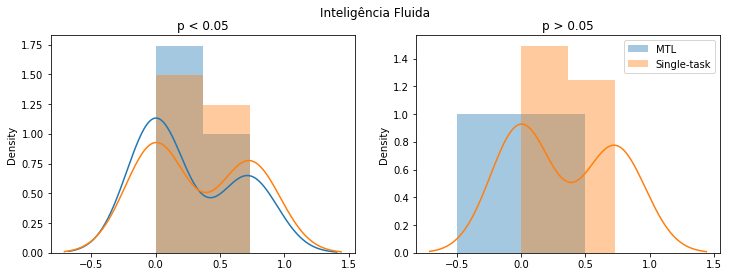

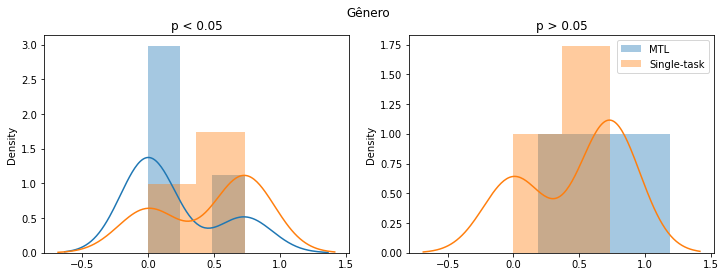

In [34]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,4))
fig.suptitle(dictTaks['PMAT'])
sns.distplot(ax=axes[0], a=mean_mtl[listRejeita['PMAT']],label='MTL')
sns.distplot(ax=axes[0], a=mean_single_pmat[listRejeita['PMAT']],label='Single-task')
axes[0].set_title('p < 0.05')

sns.distplot(ax=axes[1], a=mean_mtl[listAceita['PMAT']],label='MTL')
sns.distplot(ax=axes[1], a=mean_single_pmat[listRejeita['PMAT']],label='Single-task')
axes[1].set_title('p > 0.05')
plt.legend()

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(12,4))
fig.suptitle(dictTaks['Gender'])
sns.distplot(ax=axes[0], a=mean_mtl[listRejeita['Gender']],label='MTL')
sns.distplot(ax=axes[0], a=mean_single_gender[listRejeita['Gender']],label='Single-task')
axes[0].set_title('p < 0.05')

sns.distplot(ax=axes[1], a=mean_mtl[listAceita['Gender']],label='MTL')
sns.distplot(ax=axes[1], a=mean_single_gender[listRejeita['Gender']],label='Single-task')
axes[1].set_title('p > 0.05')
plt.legend()
# plt.savefig(str(key) + "_density.png")

In [35]:
merjado[['equivalente_standard_label','Gender']]

,equivalente_standard_label,Gender
0,[cortex_right],1.0
1,"[cortex_left, cortex_right]",1.0
2,"[cortex_left, cortex_right, diencephalon_left,...",1.0
3,"[cortex_left, cortex_right]",1.0
4,"[cortex_left, cortex_right]",1.0
...,...,...
195,[cerebellum_right],1.0
196,[cerebellum_left],1.0
197,"[cortex_right, diencephalon_right, hippocampus...",1.0
198,"[cortex_left, diencephalon_left, hippocampus_l...",1.0


(6, 3)


,todas,equivalente_standard,equivalente_standard_label,equivalente_yeo7,equivalente_yeo7_label,equivalente_ca_network,equivalente_ca_network_label,Gender,MMSE,PMAT
0,0,[2],[cortex_right],[1],[Visual],"[1, 2]","[Visual1, Visual2]",0.0,0.0,1.0
1,1,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2],0.0,1.0,0.0
2,2,"[1, 2, 369, 370]","[cortex_left, cortex_right, diencephalon_left,...","[0, 1]","[, Visual]","[1, 2, 9]","[Visual1, Visual2, Default]",0.0,0.0,0.0
3,3,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2],0.0,0.0,0.0
4,4,"[1, 2]","[cortex_left, cortex_right]",[1],[Visual],[2],[Visual2],0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,195,[368],[cerebellum_right],[0],[],"[3, 4, 5, 7, 10]","[Somatomotor, Cingulo-Opercular, Dorsal-attent...",0.0,0.0,0.0
196,196,[367],[cerebellum_left],[0],[],"[3, 4, 7, 10]","[Somatomotor, Cingulo-Opercular, Frontoparieta...",0.0,0.0,0.0
197,197,"[2, 370, 372, 378]","[cortex_right, diencephalon_right, hippocampus...","[0, 1, 5, 7]","[, Visual, Limbic, Default]","[1, 2, 3, 7, 8, 9, 12]","[Visual1, Visual2, Somatomotor, Frontoparietal...",0.0,0.0,0.0
198,198,"[1, 369, 371, 373]","[cortex_left, diencephalon_left, hippocampus_l...","[0, 1, 7]","[, Visual, Default]","[1, 2, 3, 4, 7, 8, 9]","[Visual1, Visual2, Somatomotor, Cingulo-Opercu...",0.0,0.0,0.0


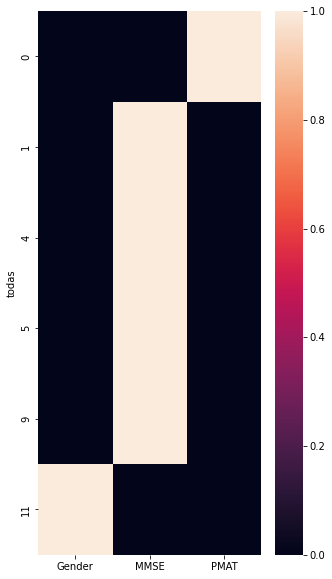

In [36]:
import pandas as pd
dataframe = pd.DataFrame({'Gender' : np.isin(allRois, listAceita['Gender']),
                            'PMAT':np.isin(allRois, listAceita['PMAT']),
                            'MMSE':np.isin(allRois, listAceita['MMSE']), 
                            'todas':allRois})
pivotado = dataframe.pivot_table(index='todas')
print(pivotado.loc[~(pivotado==0).all(axis=1)].shape)
fig = plt.figure(figsize=(5,10))
sns.heatmap(pivotado.loc[~(pivotado==0).all(axis=1)])
pd.merge(dfEquivalente,pivotado, on='todas')


# Intersecção entre as regiões p > 0.05 para todas as tarefas

In [37]:
intersection = set(listAceita['PMAT']).intersection(listAceita['MMSE'])
intersectionAllAceita = intersection.intersection(listAceita['Gender'])
intersectionAllAceita = list(set(intersectionAllAceita))
len(intersectionAllAceita)

0

# União de todas as regiões que aceitam p > 0.05

In [38]:
aceita_todas = list(set(listAceita['PMAT'] + listAceita['MMSE'] + listAceita['Gender']))
len(aceita_todas)

6

In [39]:
dfResult.iloc[aceita_todas].to_csv("aceitam_pelo_menos1_.csv")

In [40]:
len(hcp.yeo7.map_all)

91282

In [41]:
vet = np.copy(X[0])
   
for k in aceita_todas:  
    vet[vet == int(k)] = 0.5 # p > 0.05

for i in list(set(intersectionAllRej)):
    vet[vet == int(i)] = -0.5 # p < 0.05
vet[None,:].shape

(1, 91282)

In [43]:
vet

array([43. , -0.5, 69. , ..., -0.5, -0.5, -0.5])

In [ ]:
X_ = np.array(X)
dfEquivalente = pd.DataFrame({'todas': list(range(200))})
dfEquivalente['equivalente_standard'] = dfEquivalente['todas'].apply(lambda x: np.unique(hcp.standard.map_all[np.where(X_[0] == x)]))
dfEquivalente['equivalente_standard_label'] = dfEquivalente['equivalente_standard'].apply(lambda x : [hcp.standard.labels[x] for x in x])
dfEquivalente

In [ ]:
hcp.yeo7.map_all[51309]

In [ ]:
hcp.yeo7.map_all

In [ ]:
Xp = hcp.parcellate(X, hcp.yeo7)
df = hcp.ranking(Xp[0], hcp.yeo7)

In [ ]:
Xp

In [42]:
plotting.view_surf(hcp.mesh.inflated, hcp.cortex_data(vet, fill=0),  bg_map=hcp.mesh.sulc, cmap='Accent').save_as_html("aceita_todas_intersectionAllRej.html")

# Wilcoxon greater

In [ ]:
a = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_multitask/scores/test_hard_SHARED_CWEIGHT_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v1/scorestest_hard_SHARED_CWEIGHT_HCP_MTL_PMAT24_A_CR_MMSE_Score_Gender_v1.npy')
pmat_scores = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_PMAT_v2/scorestest_Single_PMAT_v2.npy')
mmse_scores = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_MMSE_Score_v2/scorestest_Single_MMSE_Score_v2.npy')
gender_scores = np.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/experimentos_finais/GNN/BrainGNN_single/scores/test_Single_Gender_v2/scorestest_Single_Gender_v2.npy')
# b = np.load('vetor_scorestest_HCP_MTL_reg_gender_pmat_mmse_v4.npy')

listRejeitaAumento = dict({'PMAT':list(), 'MMSE':list(), 'Gender':list()})
listAceitaAumento =  dict({'PMAT':list(), 'MMSE':list(), 'Gender':list()})
WILC = pd.DataFrame(columns=cols)
for region in range(N_REGIONS):
    WILC.loc[region,'idRegion'] = region
    # w, p = pgWilc(a[:, region],pmat_scores[:, region], alternative='less')
    w, p_ = wilcoxon(a[:, region],pmat_scores[:, region],alternative='greater')
    WILC.loc[region,'Single PMAT - MTL'] = (w, p)
    if p_ < 0.05:
        # print("Hipotese nula rejeitada, data are different in your case")
        listRejeitaAumento['PMAT'].append(region)
    else:
        # print("we have not enough evidences to reject H0")
        listAceitaAumento['PMAT'].append(region)
    
    w, p_ = wilcoxon(a[:, region],mmse_scores[:, region],alternative='greater')
    WILC.loc[region,'Single MMSE Score - MTL'] = (w, p_)
    if p_ < 0.05:
        # print("Hipotese nula rejeitada")
        listRejeitaAumento['MMSE'].append(region)
    else:
        # print("Hipotese nula aceita")
        listAceitaAumento['MMSE'].append(region)

    w, p_ = wilcoxon(a[:, region],gender_scores[:, region],alternative='greater')
    WILC.loc[region,'Single Gender - MTL'] = (w, p_)
    if p_ < 0.05:
        # print("Hipotese nula rejeitada")
        listRejeitaAumento['Gender'].append(region)
    else:
        # print("Hipotese nula aceita")
        listAceitaAumento['Gender'].append(region)

# "greater" is the alternative that x has a larger mean than y
listAceitaAumentoUnique = list(set(listAceitaAumento['PMAT'] + listAceitaAumento['MMSE'] + listAceitaAumento['Gender']))

intersection = set(listRejeitaAumento['Gender']).intersection(listRejeitaAumento['MMSE'])
intersectionAllRejUnique = intersection.intersection(listRejeitaAumento['PMAT'])
intersectionAllRejUnique = list(set(intersectionAllRejUnique))
len(intersectionAllRejUnique)

print("listAceitaAumento: PMAT {:%d} MMSE {:%d} Gender {:%d}" % (len(listAceitaAumento['PMAT']), len(listAceitaAumento['MMSE']),len(listAceitaAumento['Gender'])))
print("listRejeitaAumento: PMAT {:%d} MMSE {:%d} Gender {:%d}" % (len(listRejeitaAumento['PMAT']), len(listRejeitaAumento['MMSE']), len(listRejeitaAumento['Gender'])))

In [ ]:
len(intersectionAllRejUnique)

In [ ]:
WILC.iloc[intersectionAllRejUnique].to_csv('intersectionAllRejUnique.csv')

In [ ]:
WILC['equivalente_standard'] = WILC['idRegion'].apply(lambda x: np.unique(hcp.standard.map_all[np.where(X_[0] == x+1)]))

WILC['equivalente_standard_label'] = WILC['equivalente_standard'].apply(lambda x : [hcp.standard.labels[x] for x in x])


In [ ]:
WILC['equivalente_standard_label'] = WILC['equivalente_standard_label'].apply(lambda p: " | ".join(str(x) for x in sorted(p)))

In [ ]:
WILC.iloc[intersectionAllRejUnique].to_csv('intersectionAllRejUnique.csv')

In [ ]:
from pingouin import wilcoxon as pgWilc
result = pgWilc(a[:, 1],pmat_scores[:, 1], alternative='less')
result = result.reset_index()
WILC = pd.DataFrame({'todas':allRois})
WILC[result.columns.values] = result.iloc[0]
WILC.iloc[1][result.columns.values] = result.iloc[0]

In [ ]:
hcp.yeo7

In [ ]:
import hcp_utils as hcp
import nibabel as nib
img = nib.load('/home/dbserver/Desktop/projetos/repositorios_mestrado/1_mestrado_final/hcp_data/groupICA_3T_HCP1200_MSMAll_d200.ica/melodic_IC_ftb.dlabel.nii')
X = img.get_fdata()
vet = np.copy(X[0])
for i in range(200):
    vet[vet == i] = SCORES[i]
vetFinal = vet[None,:]
n_components, sizes, rois = hcp.cortical_components(vetFinal[0]>0.2, cutoff=36)
n_components, sizes

In [ ]:
plotting.view_surf(hcp.mesh.inflated, 
    hcp.cortex_data(hcp.mask(vetFinal[0], hcp.yeo7.map_all==1)), 
    threshold=0.1, bg_map=hcp.mesh.sulc)

In [ ]:
len(listAceitaAumentoUnique), len(intersectionAllRejUnique)

In [ ]:
Xp = hcp.parcellate(vetFinal, hcp.yeo7)
df = hcp.ranking(Xp[0], hcp.yeo7)

from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3)
for region in range(3):
    print(region)
    for i in range(162):
        fig.add_trace(go.Scatter(x=['Single PMAT', 'MTL'], y=[pmat_scores[i, region],a[i, region]],
                            mode='lines+markers',
                            name='Subj'+str(i)),row=region+1, col=1)
        fig.add_trace(go.Scatter(x=['Single gender', 'MTL'], y=[gender_scores[i, region],a[i, region]],
                        mode='lines+markers',
                        name='Subj'+str(i)),row=region+1, col=2)
        fig.add_trace(go.Scatter(x=['Single MMSE', 'MTL'], y=[mmse_scores[i, region],a[i, region]],
                        mode='lines+markers',
                        name='Subj'+str(i)),row=region+1, col=3)